This is based on the simulations done in 
# Factors Influencing the Detectability of Early Warning Signals of Population Collapse

This is a simulation of a onlinear equation with multiplicative noise using a Heun method where the noise only applies on the variable and not the parameter. 

\begin{equation}
\dot{x}=[rx(1-x/K)-\lambda\frac{x^2}{x^2+h^2}]dt+\sigma x dW
\end{equation}

where $x$ is a random variable and $\lambda$ is a swiped parameter determined by $\dot{\lambda}=c_\lambda$. Here $c_\lambda=[0.025,0.03,...,0.07]$
r=1, k=100, h=1, c_0=1


In [1]:
import os 
cwd = os.getcwd()
import sys
#sys.path.append("C:/Users/928814/Documents/global_python_codes/Metrics_thresholds_boots") # go to parent dir
import sympy as sp
import numpy as np
import sdeint
#import metrics
import matplotlib.pyplot as plt
from scipy.integrate import odeint

plt.rcParams.update({'font.size': 18})

In [2]:
xs, rs, ks, hs, cs, a, ls = sp.symbols('x r k h c a lambda')
eq=rs*xs*(1-xs/ks)-ls*(xs**2)/(xs**2+hs**2)
eq2=eq.subs(hs, 1)
eq2=eq2.subs(rs, 1)
eq3=1*(1-xs/100)-ls*(xs)/(xs**2+1**2)
sp.solve(eq3, xs)

[-(9997 - 300*lambda)/(3*(45000*lambda + sqrt(-4*(9997 - 300*lambda)**3 + (90000*lambda - 2001800)**2)/2 - 1000900)**(1/3)) - (45000*lambda + sqrt(-4*(9997 - 300*lambda)**3 + (90000*lambda - 2001800)**2)/2 - 1000900)**(1/3)/3 + 100/3,
 -(9997 - 300*lambda)/(3*(-1/2 - sqrt(3)*I/2)*(45000*lambda + sqrt(-4*(9997 - 300*lambda)**3 + (90000*lambda - 2001800)**2)/2 - 1000900)**(1/3)) - (-1/2 - sqrt(3)*I/2)*(45000*lambda + sqrt(-4*(9997 - 300*lambda)**3 + (90000*lambda - 2001800)**2)/2 - 1000900)**(1/3)/3 + 100/3,
 -(9997 - 300*lambda)/(3*(-1/2 + sqrt(3)*I/2)*(45000*lambda + sqrt(-4*(9997 - 300*lambda)**3 + (90000*lambda - 2001800)**2)/2 - 1000900)**(1/3)) - (-1/2 + sqrt(3)*I/2)*(45000*lambda + sqrt(-4*(9997 - 300*lambda)**3 + (90000*lambda - 2001800)**2)/2 - 1000900)**(1/3)/3 + 100/3]

In [3]:
Mx=sp.diff(eq,xs)
Mx=sp.diff(eq3,xs)
Mx

2*lambda*x**2/(x**2 + 1)**2 - lambda/(x**2 + 1) - 1/100

In [4]:
M0=Mx.subs(xs, 0)
M0

-lambda - 1/100

In [5]:
sp_xu=-(9997 - 300*ls)/(3*(45000*ls + sp.sqrt(-4*(9997 - 300*ls)**3 + (90000*ls - 2001800)**2)/2 - 1000900)**(1/3)) - (45000*ls + sp.sqrt(-4*(9997 - 300*ls)**3 + (90000*ls - 2001800)**2)/2 - 1000900)**(1/3)/3 + 100/3

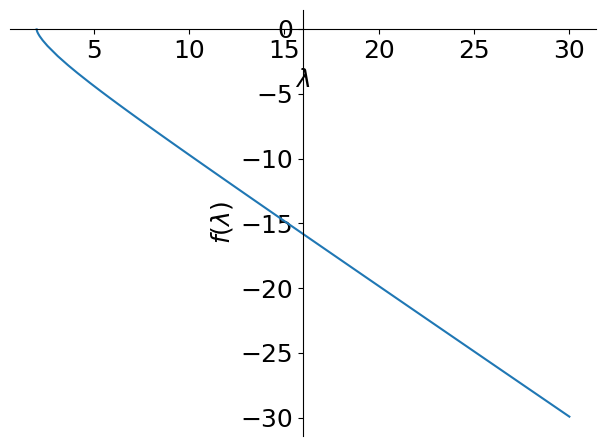

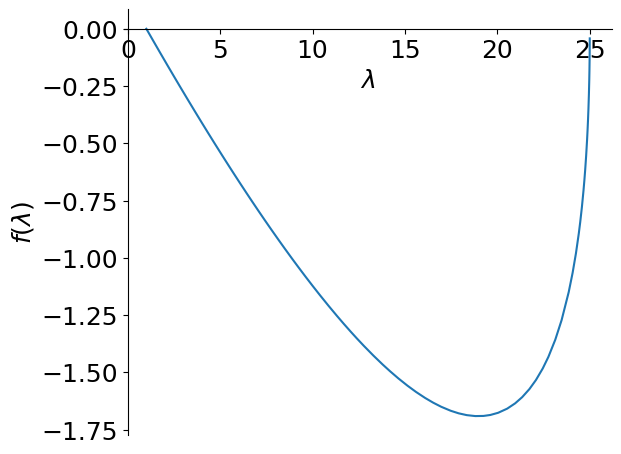

In [6]:
mr=Mx.subs(xs,sp_xu)
p1=sp.plotting.plot(mr, (ls, 1, 30))
p1=sp.plotting.plot(1/mr, (ls, 2.2, 35))

sp_xu2=-(9997 - 300*ls)/(3*(-1/2 + sp.sqrt(3)*1j/2)*(45000*ls + sp.sqrt(-4*(9997 - 300*ls)**3 + (90000*ls - 2001800)**2)/2 - 1000900)**(1/3)) - (-1/2 + sp.sqrt(3)*1j/2)*(45000*ls + sp.sqrt(-4*(9997 - 300*ls)**3 + (90000*ls - 2001800)**2)/2 - 1000900)**(1/3)/3 + 100/3
mr2=Mx.subs(xs,sp_xu2)
p1=sp.plotting.plot(mr2, (ls, 1, 26))

p1=sp.plotting.plot(mr2*(ls-1)/0.07, (ls, 1, 26))


In [7]:
from matplotlib.colors import ListedColormap, BoundaryNorm, LinearSegmentedColormap
from matplotlib import cm
cmap =cm.get_cmap('turbo')


C:\Users\jp928814\AppData\Local\Temp\ipykernel_3508\1611679012.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap =cm.get_cmap('turbo')


In [8]:
def s1(lv):
    lv=lv+0*lv*1j
    return -(9997 - 300*lv)/(3*(45000*lv + np.emath.sqrt(-4*(9997 - 300*lv)**3 + (90000*lv - 2001800)**2)/2 - 1000900)**(1/3)) - (45000*lv + np.emath.sqrt(-4*(9997 - 300*lv)**3 + (90000*lv - 2001800)**2)/2 - 1000900)**(1/3)/3 + 100/3


def s2(lv):
    lv=lv+0*lv*1j
    return -(9997 - 300*lv)/(3*(-1/2 - np.emath.sqrt(3)*1j/2)*(45000*lv + np.emath.sqrt(-4*(9997 - 300*lv)**3 + (90000*lv - 2001800)**2)/2 - 1000900)**(1/3)) - (-1/2 - np.emath.sqrt(3)*1j/2)*(45000*lv + np.emath.sqrt(-4*(9997 - 300*lv)**3 + (90000*lv - 2001800)**2)/2 - 1000900)**(1/3)/3 + 100/3


def s3(lv):
    lv=lv+0*lv*1j
    return -(9997 - 300*lv)/(3*(-1/2 + np.emath.sqrt(3)*1j/2)*(45000*lv + np.emath.sqrt(-4*(9997 - 300*lv)**3 + (90000*lv - 2001800)**2)/2 - 1000900)**(1/3)) - (-1/2 + np.emath.sqrt(3)*1j/2)*(45000*lv + np.emath.sqrt(-4*(9997 - 300*lv)**3 + (90000*lv - 2001800)**2)/2 - 1000900)**(1/3)/3 + 100/3

lvar=np.linspace(0,28,6900)



## Test using a single initial condition some distance from the critical value

0
20
40
60
80
100
120
140
160
180


C:\Users\jp928814\AppData\Local\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\jp928814\AppData\Local\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


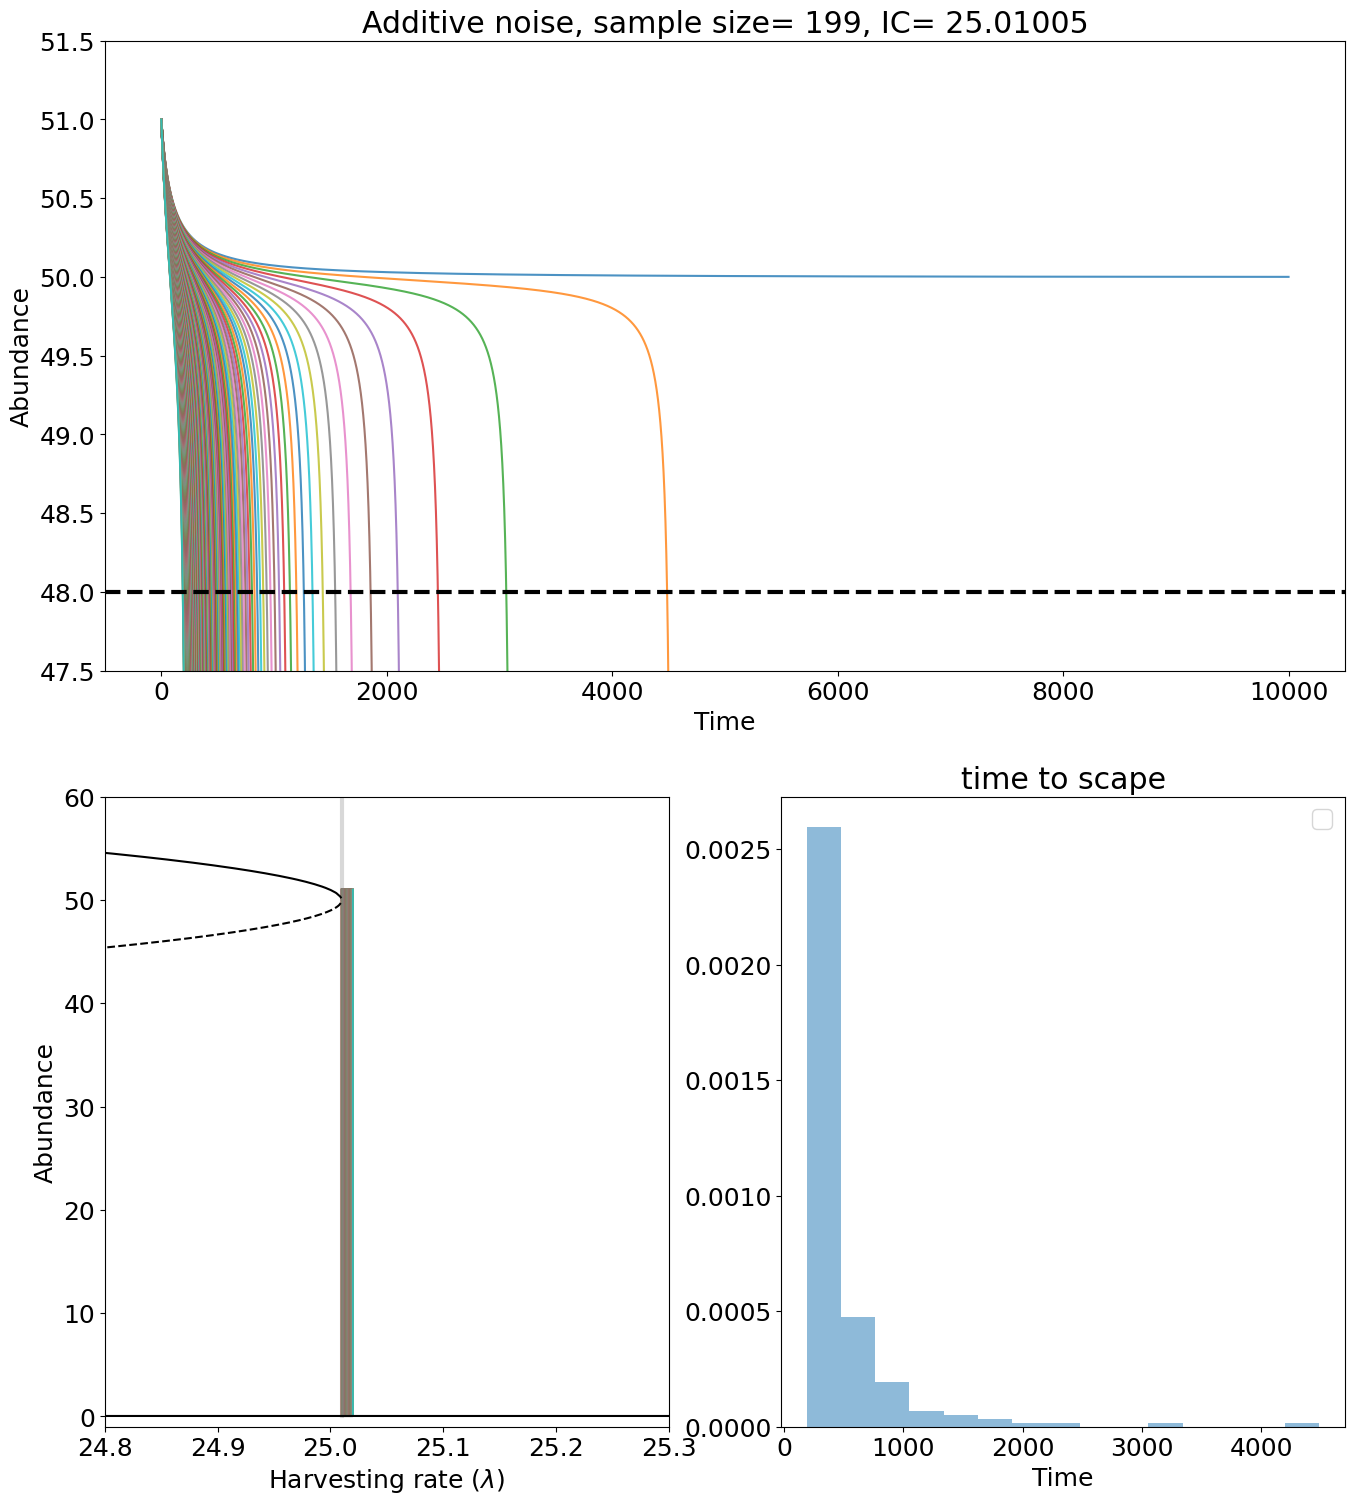

In [9]:

crit=1

k=100
r=1
h=1 
cases=500
t_final=10000

li=25.01+0.00005
s=0.0008
l0=li
lf=28
# cl=np.sign(lf-l0)*cls[j]

deltas=np.arange(25.01,25.02,0.00005)


t_rm=np.abs(0.9)
t_threshold=t_rm/2
dt=t_threshold/4

datalen=t_final/300
if datalen>=t_threshold/2: 
    datalen=t_threshold/2

t_win=t_rm/datalen ### length of correlation. 
tspan=np.arange(0,t_final,datalen)

x0= 51#50  
    
#N=np.zeros((cases,len(tspan)))


t_scape=np.zeros((cases))
threshold=48
    

fig=plt.figure(figsize=(16, 18))
ax=fig.add_subplot(223)
ax2=fig.add_subplot(211)
ax3=fig.add_subplot(224)
lvar=np.linspace(26,24,20000)


def f(x, t):
    l=l0
    A=r*x*(1-x/k)-l*(x**2)/(x**2+h**2)
    return A

def g(x, t):
    #B=[ 'noise in x'         0    ]
    #  [      0        'noise in r']
    B = s*x0/4 # diagonal, so independent driving Wiener processes
    #the only parameter with relevant aditive noise is X(t) in this case. 
    return B


for j in range(len(deltas)):
    l0=deltas[j]
    res_det=odeint(f, x0, tspan)


    np.random.seed(1) #set numpy.random seed for reproducibility whenever it might be used.
    cl=0
    l1=l0+cl*tspan
    #dl=cl*tspan[1]-l0


    try:
        index = np.argwhere(res_det < threshold)[0][0]
        t_scape[j]=tspan[index]
    except:
        t_scape[j]=0
        
    #N[j,:]=res.reshape(len(tspan), )
    ax.plot(l1,res_det,alpha=0.8)
    ax2.plot(tspan,res_det,alpha=0.8)
    if j%20==0: print(j)
    # ax.plot(tspan,res,color=cmap(np.int64(255*pnorm[j])),alpha=0.8)

ax.plot([25.01,25.01],[0,100],color='gray',lw=3,alpha=0.3)
ax.plot(lvar[np.isreal(s1(lvar))],s1(lvar)[np.isreal(s1(lvar))],'-k')
ax.plot(lvar[np.isreal(s2(lvar))],s2(lvar)[np.isreal(s2(lvar))],'--k')
ax.plot(lvar[np.isreal(s3(lvar))],s3(lvar)[np.isreal(s3(lvar))],'-k')
ax.set_title('')


#cbar_ax = fig.add_axes([0.91, 0.11, 0.025, 0.77])
#norm = BoundaryNorm(np.sort(cls), cmap.N)
#cbar=fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax, ax=ax)
#cbar.set_label(r'$c_\lambda$', rotation=90,labelpad=3)

ax.set_ylabel('Abundance')
ax.set_xlabel('Harvesting rate ($\lambda$)')
ax.set_ylim([-1,60])
ax.set_xlim([24.8,25.3])

ax2.set_ylabel('Abundance')
ax2.set_xlabel('Time')
ax2.set_ylim([47.5,51.5])

data=t_scape[t_scape>1]

ax2.set_title('Additive noise, sample size= %.i, IC= %.5f' %(len(data),li))

ax3.set_ylabel('')
ax3.set_xlabel('Time')
ax3.set_title('time to scape')

plt.legend()
try:
    index = np.argwhere(res_det < threshold)[0][0]
except:
    index=0
    
from scipy.optimize import curve_fit
n, bins, patches = ax3.hist(data, bins=15, density=True,alpha=0.5)
        
def exp_func(x, a, b, c):
    return a * np.exp(-b * (x-c))
bin_centers = (bins[:-1] + bins[1:]) / 2
popt, pcov = curve_fit(exp_func, bin_centers, n)
xfit = np.linspace(0, np.max(data), 100)
yfit = exp_func(data, *popt)
#ax3.plot(xfit, yfit, 'r-', label='fit: a=%.3f, b=%.3f, c=%.3f' % tuple(popt))
ax2.axhline(y=threshold, color='k',lw=3,linestyle='--',label='threshold')

C:\Users\jp928814\AppData\Local\Temp\ipykernel_28336\3526703213.py:44: RuntimeWarning: overflow encountered in double_scalars
  A=r*x*(1-x/k)-l*(x**2)/(x**2+h**2)
C:\Users\jp928814\AppData\Local\Temp\ipykernel_28336\3526703213.py:44: RuntimeWarning: invalid value encountered in double_scalars
  A=r*x*(1-x/k)-l*(x**2)/(x**2+h**2)


0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480


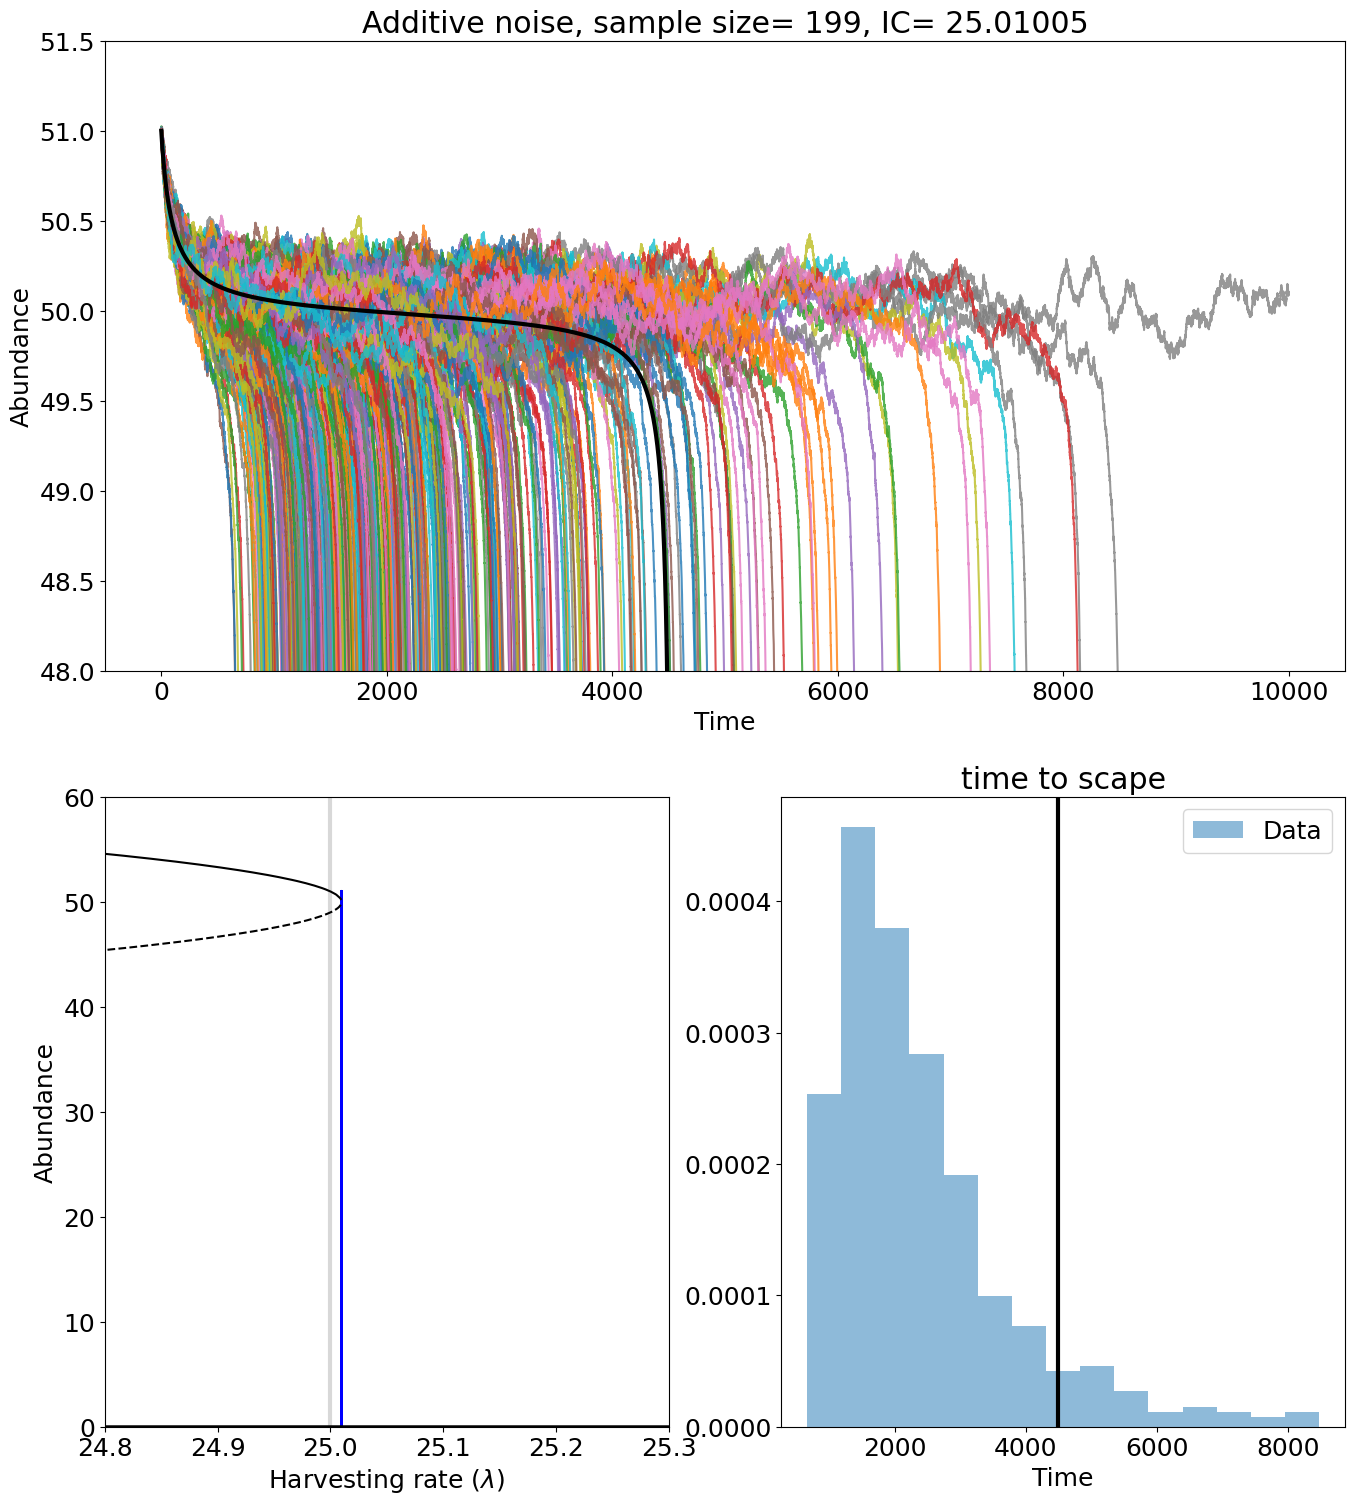

In [10]:

crit=1

k=100
r=1
h=1 
cases=500
t_final=10000

li=25+0.01005
s=0.0008
l0=li
lf=28
# cl=np.sign(lf-l0)*cls[j]

t_rm=np.abs(0.9)
t_threshold=t_rm/2
dt=t_threshold/4

datalen=t_final/300
if datalen>=t_threshold/2: 
    datalen=t_threshold/2

t_win=t_rm/datalen ### length of correlation. 
tspan=np.arange(0,t_final,datalen)

x0= 51#50  
    
#N=np.zeros((cases,len(tspan)))


t_scape=np.zeros((cases))
threshold=48
    

fig=plt.figure(figsize=(16,18))
ax=fig.add_subplot(223)
ax2=fig.add_subplot(211)
ax3=fig.add_subplot(224)
lvar=np.linspace(26,24,20000)


def f(x, t):
    l=l0
    A=r*x*(1-x/k)-l*(x**2)/(x**2+h**2)
    return A

def g(x, t):
    #B=[ 'noise in x'         0    ]
    #  [      0        'noise in r']
    B = s*x0/4 # diagonal, so independent driving Wiener processes
    #the only parameter with relevant aditive noise is X(t) in this case. 
    return B

res_det=odeint(f, x0, tspan)
np.random.seed(1) #set numpy.random seed for reproducibility whenever it might be used.
cl=0
l1=l0+cl*tspan

def integ(x0,tspan,t_scape,j):
    res = sdeint.stratHeun(f, g, x0, tspan)
    try:
        index = np.argwhere(res < threshold)[0][0]
        t_scape[j]=tspan[index]
    except:
        t_scape[j]=0
    ax.plot(l1,res,color='blue',alpha=0.8)
    ax2.plot(tspan,res,alpha=0.8)
    if j%20==0: print(j)
    return 

[integ(x0,tspan,t_scape,j) for j in range(cases) ]
   

ax.plot([25,25],[0,100],color='gray',lw=3,alpha=0.3)
ax.plot(lvar[np.isreal(s1(lvar))],s1(lvar)[np.isreal(s1(lvar))],'-k')
ax.plot(lvar[np.isreal(s2(lvar))],s2(lvar)[np.isreal(s2(lvar))],'--k')
ax.plot(lvar[np.isreal(s3(lvar))],s3(lvar)[np.isreal(s3(lvar))],'-k')
ax2.set_title('Additive noise, sample size= %.i, IC= %.5f' %(len(data),li))
ax.set_title('')


#cbar_ax = fig.add_axes([0.91, 0.11, 0.025, 0.77])
#norm = BoundaryNorm(np.sort(cls), cmap.N)
#cbar=fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax, ax=ax)
#cbar.set_label(r'$c_\lambda$', rotation=90,labelpad=3)

ax.set_ylabel('Abundance')
ax.set_xlabel('Harvesting rate ($\lambda$)')
ax.set_ylim([0,60])
ax.set_xlim([24.8,25.3])

ax2.set_ylabel('Abundance')
ax2.set_xlabel('Time')
ax2.set_ylim([48,51.5])
ax2.plot(tspan,res_det,'-k',lw=3,label='Deterministic')

data=t_scape[t_scape>1]
ax3.hist(data,bins=15, density=True, alpha=0.5, label='Data')

ax3.set_ylabel('')
ax3.set_xlabel('Time')
ax3.set_title('time to scape')

plt.legend()
try:
    index = np.argwhere(res_det < threshold)[0][0]
except:
    index=0
        
ax3.axvline(x=tspan[index], color='k',lw=3,label='Deterministic')

In [ ]:
from scipy.stats import poisson
from scipy.stats import rayleigh
from scipy.optimize import curve_fit

fig=plt.figure()
ax=fig.add_subplot(111)
#ax.hist(t_scape[t_scape>1])  
data=t_scape[t_scape>1]

datar=data
#ax.hist(datar, bins=15, density=True, alpha=0.5, label='Data')
#param, cov = curve_fit(poisson_func,np.linspace(0, np.max(data),10), np.histogram(data, bins=10)[0])
#ax.plot(np.linspace(0, np.linspace(0, np.max(data),10),10), poisson_func(np.linspace(0, np.max(data),10), *param), 'r-', lw=2, label='Poisson fit')


hist, bins = np.histogram(datar, bins='auto', density=True)
bin_centers = (bins[:-1] + bins[1:]) / 2

params = rayleigh.fit(datar)
pdf_fitted = rayleigh.pdf(bin_centers, *params)
scale = params[0]

# Define the Poisson PDF
def poisson_pdf(k, lamb):
    return (lamb**k / np.math.factorial(k)) * np.exp(-lamb)

# Fit the Poisson distribution to the data
#param, _ = curve_fit(poisson_pdf, bin_centers.astype(float), hist)

# Compute the PMF of the fitted Poisson distribution
#pmf_fitted = poisson_pdf(bin_centers, *param)



#x = np.linspace(0, np.max(tspan), 1000)
pdf = rayleigh.pdf(x, loc=0, scale=scale)

# Plot the PDF
#ax.plot(x, pdf, 'r-', label='Rayleigh PDF')
plt.hist(datar, bins='auto', density=True, alpha=0.5, label='Data')
plt.plot(bin_centers, pdf_fitted, 'r-', lw=2, label='Rayleigh fit')
#plt.plot(bin_centers, pmf_fitted, 'r-', lw=2, label='Poisson fit')
plt.legend()
ax.set_title('time to scape')
ax.set_xlabel('Time [s]')

np.min(datar)
# Plot the histogram of the data with the fitted Poisson distribution
#plt.hist(data, bins=20, density=True, alpha=0.5, label='Data')
#plt.legend()
#plt.show()
params

# swiping the parameter

Text(0, 0.5, '$\\lambda$')

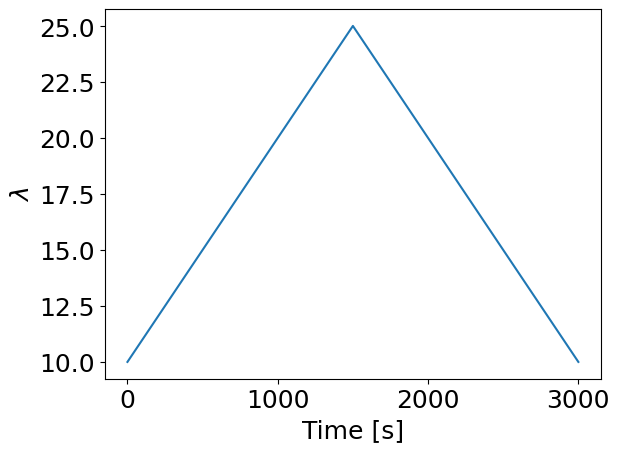

In [12]:
li=10
l0=li
lcrit=25+0.01
lf=lcrit

cl=np.sign(lf-l0)*0.01

t_final=2*(lf-l0)/cl
t_rm=np.abs(0.1)
t_threshold=t_rm/2
dt=t_threshold/4

datalen=t_final/300
if datalen>=t_threshold/2: 
    datalen=t_threshold/2

t_win=t_rm/datalen ### length of correlation. 
tspan=np.arange(0,t_final,datalen)

l=-cl*np.abs(tspan-t_final/2)+lcrit

plt.plot(tspan,l)
plt.xlabel('Time [s]')
plt.ylabel('$\lambda$')


Text(0, 0.5, '$\\lambda$')

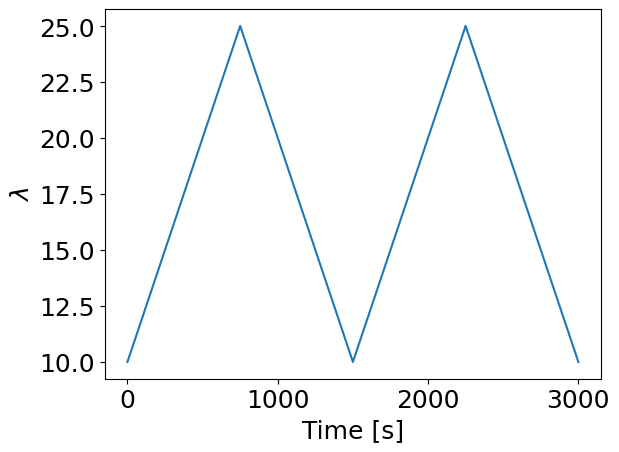

In [13]:
li=10
l0=li
lcrit=25+0.01
lf=lcrit
periods=2

cl=np.sign(lf-l0)*0.01

t_final=2*(lf-l0)/cl
t_rm=np.abs(0.1)
t_threshold=t_rm/2
dt=t_threshold/4

datalen=t_final/300
if datalen>=t_threshold/2: 
    datalen=t_threshold/2

t_win=t_rm/datalen ### length of correlation. 
tspan=np.arange(0,t_final,datalen)

periods=np.sqrt(periods)
l=-periods*cl*np.abs((tspan*periods%(t_final/periods)-(t_final/2/periods)))+lcrit

    
plt.plot(tspan,l)
plt.xlabel('Time [s]')
plt.ylabel('$\lambda$')

Text(0, 0.5, '$\\lambda$')

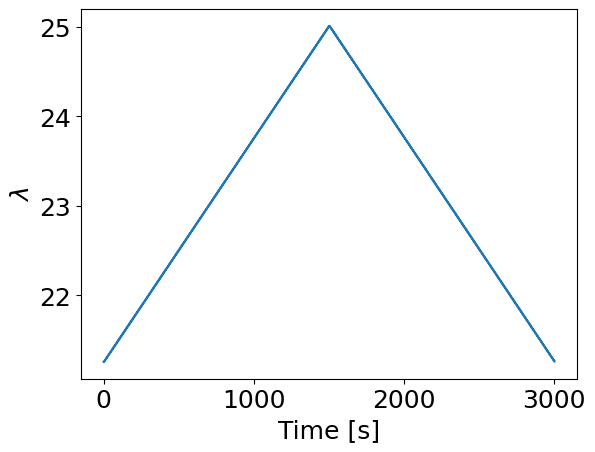

In [50]:
li=10
l0=li
lcrit=25+0.01
lf=lcrit
periods=3

cl=np.sign(lf-l0)*0.01

t_final=2*(lf-l0)/cl
t_rm=np.abs(0.1)
t_threshold=t_rm/2
dt=t_threshold/4

datalen=t_final/300
if datalen>=t_threshold/2: 
    datalen=t_threshold/2

t_win=t_rm/datalen ### length of correlation. 
tspan=np.arange(0,t_final,datalen)

tper=tspan[0:len(tspan)//periods]
lper=-cl*np.abs(tper-tper[-1]/2)+lcrit
l=np.zeros_like(tspan)
for j in range(periods):
    l[j*len(tper):(j+1)*len(tper)]=lper

plt.plot(tspan,l)
plt.xlabel('Time [s]')
plt.ylabel('$\lambda$')

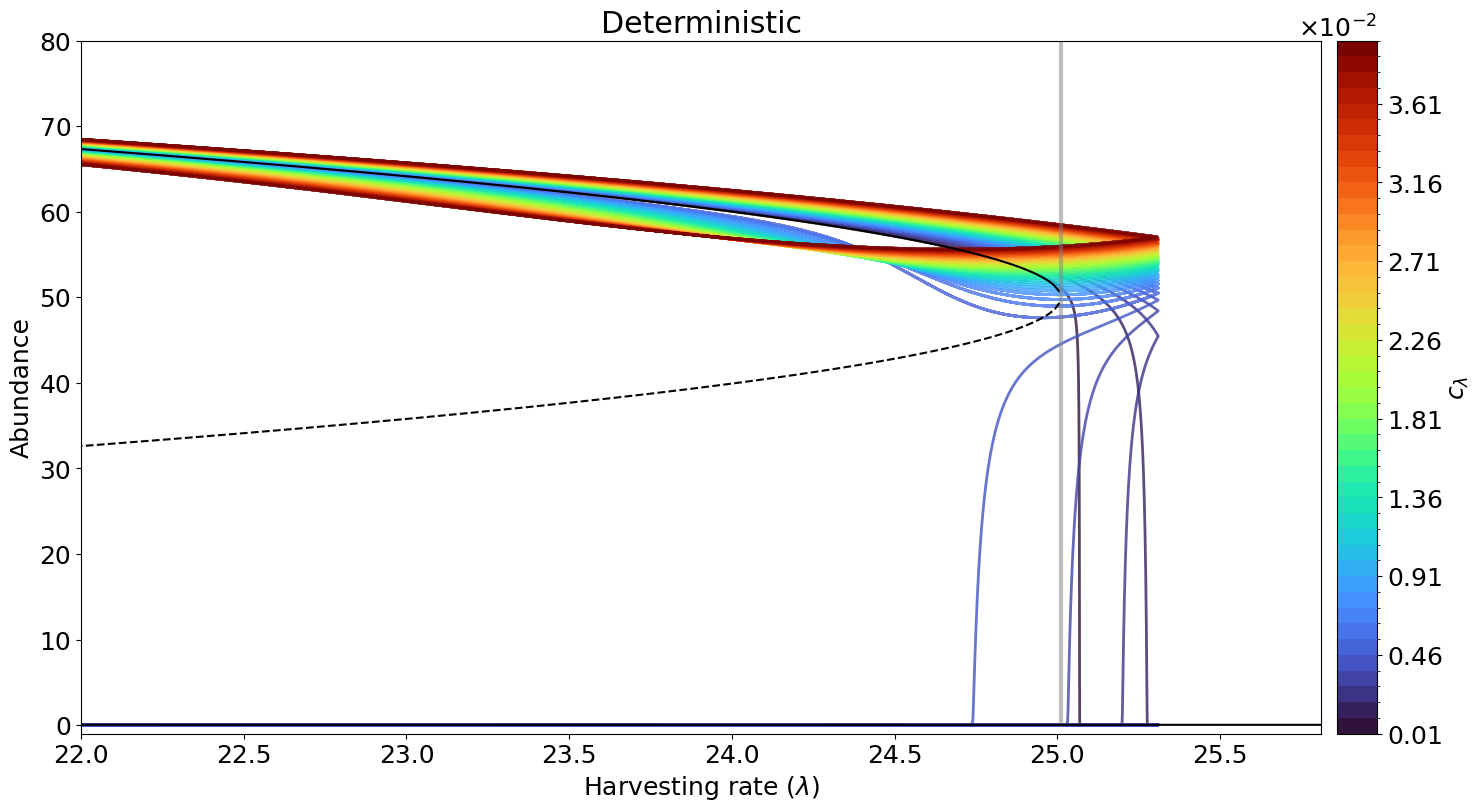

In [81]:
import matplotlib.ticker as ticker

k=100
r=1
h=1 
cls=np.arange(0.0001,0.04,0.0009)
periods=4

pnorm=(cls-np.min(cls))/np.max(cls-np.min(cls))
np.sort(pnorm)
norm = BoundaryNorm(np.sort(cls), cmap.N)

fig=plt.figure(figsize=(16, 9))
ax=fig.add_subplot(111)
for j in range(len(cls)):
    li=15
    s=0.08
    l0=li
    lcrit=25.01+0.3
    lf=lcrit
    cl=np.sign(lf-l0)*cls[j]

    t_final=2*(lf-l0)/cl
    t_rm=np.abs(0.4)
    t_threshold=t_rm/2
    dt=t_threshold/4

    datalen=t_final/300
    if datalen>=t_threshold/2: 
        datalen=t_threshold/2

    t_win=t_rm/datalen ### length of correlation. 
    tspan=np.arange(0,t_final,datalen)

    x0= 95

    def f(x, t):
        per=np.sqrt(periods)
        l=-per*cl*np.abs((t*per%(t_final/per)-(t_final/2/per)))+lcrit
        A=r*x*(1-x/k)-l*(x**2)/(x**2+h**2)
        return A

    def g(x, t):
        #B=[ 'noise in x'         0    ]
        #  [      0        'noise in r']
        B = s # diagonal, so independent driving Wiener processes
        #the only parameter with relevant aditive noise is X(t) in this case. 
        return B
    np.random.seed(1) #set numpy.random seed for reproducibility whenever it might be used.
    per=np.sqrt(periods)
    l1=-per*cl*np.abs((tspan*per%(t_final/per)-(t_final/2/per)))+lcrit
    dl=cl*tspan[1]-l0

    #result = sdeint.itoint(f, g, x0, tspan)
    res_det=odeint(f, x0, tspan)
    ax.plot(l1,res_det,color=cmap(np.int64(255*pnorm[j])),alpha=0.8,lw=2)

lvar=np.linspace(26,21,19000)
ax.plot([25.01,25.01],[0,100],color='gray',lw=3,alpha=0.5)
ax.plot(lvar[np.isreal(s1(lvar))],s1(lvar)[np.isreal(s1(lvar))],'-k')
ax.plot(lvar[np.isreal(s2(lvar))],s2(lvar)[np.isreal(s2(lvar))],'--k')
ax.plot(lvar[np.isreal(s3(lvar))],s3(lvar)[np.isreal(s3(lvar))],'-k')
ax.set_title('Deterministic')


cbar_ax = fig.add_axes([0.91, 0.11, 0.025, 0.77])
norm = BoundaryNorm(np.sort(cls), cmap.N)
cbar=fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax, ax=ax)
cbar.set_label(r'$c_\lambda$', rotation=90,labelpad=3)
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1, 1))
cbar.ax.yaxis.set_major_formatter(formatter)

ax.set_ylabel('Abundance')
ax.set_xlabel('Harvesting rate ($\lambda$)')
ax.set_ylim([-1,80])
ax.set_xlim([22,lf+0.5])
fig.savefig('Deterministic_linearperiodic_protocol.png', dpi=200)

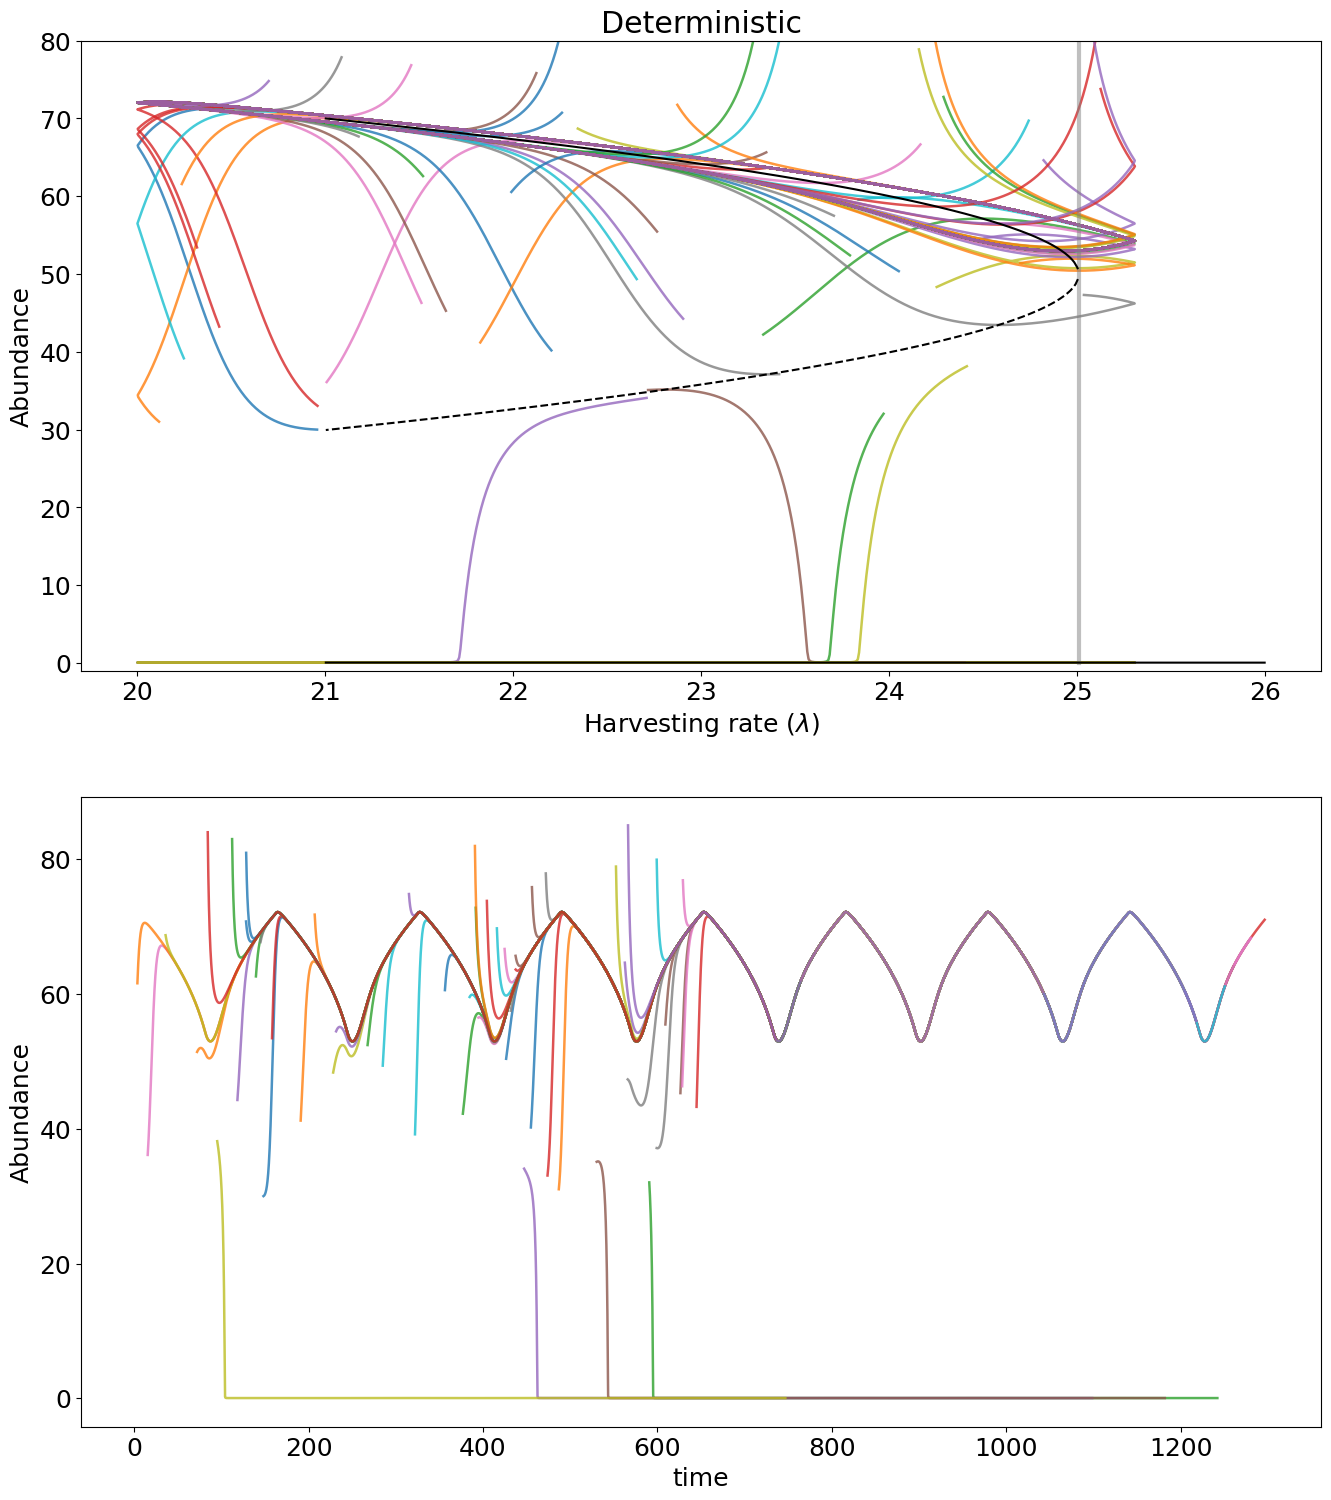

In [106]:
import matplotlib.ticker as ticker
import random



k=100
r=1
h=1 
cls=np.arange(0.0001,0.04,0.0009)
periods=4

pnorm=(cls-np.min(cls))/np.max(cls-np.min(cls))
np.sort(pnorm)
norm = BoundaryNorm(np.sort(cls), cmap.N)
x0=np.linspace(30,85,55)
fig=plt.figure(figsize=(16, 18))
ax=fig.add_subplot(211)
ax2=fig.add_subplot(212)

for j in range(len(x0)):
    li=20
    s=0.08
    l0=li
    lcrit=25.01+0.3
    lf=lcrit
    cl=np.sign(lf-l0)*cls[18]

    t_final=2*(lf-l0)/cl
    t_rm=np.abs(0.4)
    t_threshold=t_rm/2
    dt=t_threshold/4

    datalen=t_final/300
    if datalen>=t_threshold/2: 
        datalen=t_threshold/2

    t_win=t_rm/datalen ### length of correlation. 
    t0=random.random()*t_final 

    tspan=np.arange(t0,t_final+t0,datalen)

   
    def f(x, t):
        per=np.sqrt(periods)
        l=-per*cl*np.abs((t*per%(t_final/per)-(t_final/2/per)))+lcrit
        A=r*x*(1-x/k)-l*(x**2)/(x**2+h**2)
        return A

    def g(x, t):
        #B=[ 'noise in x'         0    ]
        #  [      0        'noise in r']
        B = s # diagonal, so independent driving Wiener processes
        #the only parameter with relevant aditive noise is X(t) in this case. 
        return B
    np.random.seed(1) #set numpy.random seed for reproducibility whenever it might be used.
    per=np.sqrt(periods)
    l1=-per*cl*np.abs((tspan*per%(t_final/per)-(t_final/2/per)))+lcrit
    dl=cl*tspan[1]-l0

    #result = sdeint.itoint(f, g, x0, tspan)
    res_det=odeint(f, x0[j], tspan)
    ax.plot(l1,res_det,alpha=0.8,lw=1.8)
    ax2.plot(tspan,res_det,alpha=0.8,lw=1.8)

lvar=np.linspace(26,21,19000)
ax.plot([25.01,25.01],[0,100],color='gray',lw=3,alpha=0.5)
ax.plot(lvar[np.isreal(s1(lvar))],s1(lvar)[np.isreal(s1(lvar))],'-k')
ax.plot(lvar[np.isreal(s2(lvar))],s2(lvar)[np.isreal(s2(lvar))],'--k')
ax.plot(lvar[np.isreal(s3(lvar))],s3(lvar)[np.isreal(s3(lvar))],'-k')
ax.set_title('Deterministic')
ax2.set_xlabel('time')
ax2.set_ylabel('Abundance')


ax.set_ylabel('Abundance')
ax.set_xlabel('Harvesting rate ($\lambda$)')
ax.set_ylim([-1,80])
#ax.set_xlim([22,lf+0.5])
fig.savefig('Deterministic_linearperiodic_limit_cycle_fast.png', dpi=200)